In [1]:
import json
from pprint import pprint
import matplotlib.pyplot as plt
import os, glob
plt.style.use('ggplot')

In [172]:
exp_names = {
    'exp_3': 'HalfCheetah-v2',
    'exp_4': 'Walker2d-v2',
    'exp_5': 'Hopper-v2' 
}

def apply_function_sliding_window(Y, windowsize, func):
    final_list = []
    # pad the input array
    Y = np.pad(Y, pad_width=int(windowsize/2), mode='edge')
    
    for i in range(0, len(Y)-(windowsize)):
        final_list.append(func(Y[i:i+windowsize]))
        
    return final_list

def showViz(filepath, exp):
    data_PPO = json.load(open(filepath))
    plt.plot(data_PPO['episode_rewards'])
    agent_name = filepath.split('/')[2]
    plt.title('{} : {}'.format(agent_name, exp_names[exp]))
    plt.show()
    
def compareExp(exp):
    filepath_PPO = glob.glob(os.path.join('../logs/PPO/', exp) + '/*episode*')[0]
    filepath_TRPO = glob.glob(os.path.join('../logs/TRPO/', exp) + '/*episode*')[0]
    filepath_VPG = glob.glob(os.path.join('../logs/VPG/', exp) + '/*episode*')[0]
    
    showViz(filepath_PPO, exp)
    showViz(filepath_TRPO, exp)
    showViz(filepath_VPG, exp)
    
def compareAll(mode='seperate'):
    lgpath = '../logs/'
    agent_names = ['PPO', 'TRPO', 'VPG']
    exp_names = {
        'exp_3': 'HalfCheetah-v2',
        'exp_4': 'Walker2d-v2',
        'exp_5': 'Hopper-v2' 
    }
    if mode == 'seperate':
        fig, ax = plt.subplots(nrows=3, ncols=3, squeeze=False, figsize=(20,20))

        for row, agent in zip(ax, agent_names):
            for idx, exp in enumerate(exp_names):
                # get the row, each row will have the same agent but different envs
                filepath = glob.glob(os.path.join(lgpath, agent, exp) + '/*episode*')[0]
                data = json.load(open(filepath))
                Y = apply_function_sliding_window(data['episode_rewards'], 50, np.mean)
                row[idx].plot(Y)
                row[idx].set_title('{} : {}'.format(agent, exp_names[exp]))
                row[idx].set_xlabel('Episodes')
                row[idx].set_ylabel('Reward')

        plt.savefig('./comparison.png')
        plt.show()
    else:
        fig, ax = plt.subplots(nrows=1, ncols=3, squeeze=True, figsize=(25,8))  

        
        for idx, (row, exp) in enumerate(zip(ax, exp_names)):
            for agent in agent_names:
                # get the row, each row will have the same agent but different envs
                filepath = glob.glob(os.path.join(lgpath, agent, exp) + '/*episode*')[0]
                data = json.load(open(filepath))
                Y = apply_function_sliding_window(data['episode_rewards'], 50, np.mean)

                row.plot(Y, label='{}'.format(agent))
        #                 row[0].set_title('{} : {}'.format(agent, exp_names[exp]))
                row.set_xlabel('Episodes')
                row.set_ylabel('Reward')
                row.set_title(exp_names[exp])
                row.legend()
                
        plt.suptitle('Comparison for different environments')
        plt.savefig('./comparison_combined.pdf')
        plt.show()

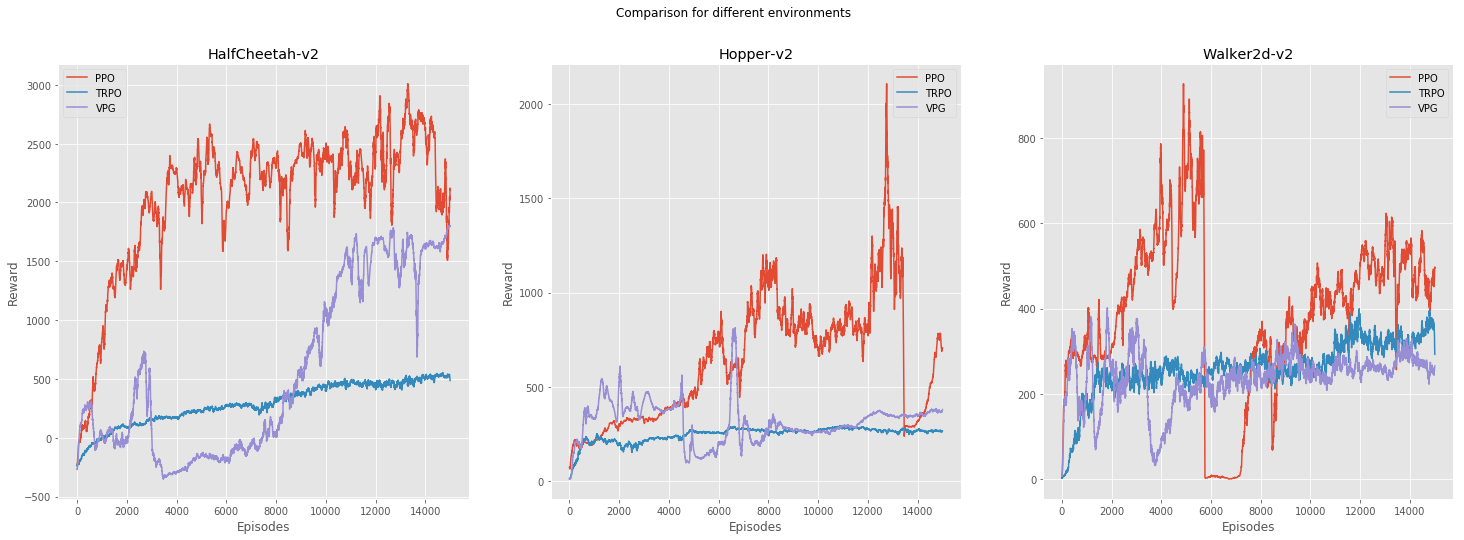

In [173]:
compareAll(mode=None)

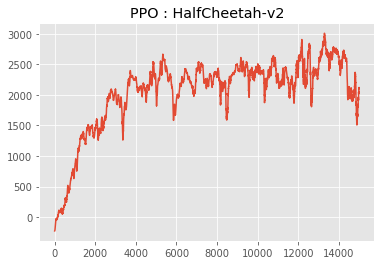

In [83]:
data_PPO = json.load(open(filepath))
x = list(range(0, 15000))

y = data_PPO['episode_rewards']
ys = apply_function_sliding_window(y, 50, np.mean)

plt.plot(ys)
agent_name = filepath.split('/')[2]
plt.title('{} : {}'.format(agent_name, exp_names[exp]))
plt.show()


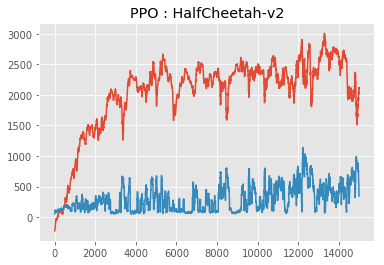

In [85]:
data_PPO = json.load(open(filepath))
x = list(range(0, 15000))

y = data_PPO['episode_rewards']
ys = apply_function_sliding_window(y, 50, np.mean)
ys_std = apply_function_sliding_window(y, 50, np.std)

plt.plot(ys)
plt.plot(ys_std)
agent_name = filepath.split('/')[2]
plt.title('{} : {}'.format(agent_name, exp_names[exp]))
plt.show()

In [21]:
from scipy.interpolate import UnivariateSpline
import numpy as np
x = list(range(0, 15000))

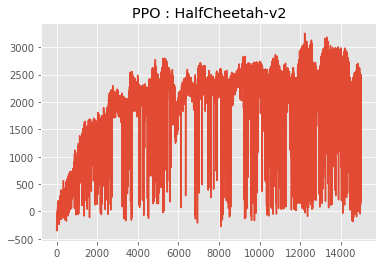

In [24]:
def showVizSmooth(filepath, exp):
    data_PPO = json.load(open(filepath))
    x = list(range(0, 15000))
    y = data_PPO['episode_rewards']
    s = UnivariateSpline(x, y)
    ys = s(x)
    plt.plot(ys)
    agent_name = filepath.split('/')[2]
    plt.title('{} : {}'.format(agent_name, exp_names[exp]))
    plt.show()
    
lgpath = '../logs/'
agent = 'PPO'
exp = 'exp_3'
filepath = glob.glob(os.path.join(lgpath, agent, exp) + '/*episode*')[0]
showVizSmooth(filepath, exp)